In [ ]:
# set working folder and import modules
import os
import pandas as pd
# import sys
# import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import davies_bouldin_score


current_dir = os.getcwd()
current_dir
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")
current_dir = os.getcwd()
current_dir
#set current working directory to H:\VScode\March Group\March_Team_Project\
os.chdir("H:\\VScode\\March Group\\March_Team_Project\\")

You set a new current directory


Load Dashboarddata.zip and calculate correclation_matrix

In [3]:
# load Outputs/DashBoardData.zip'
merged_data = pd.read_csv("Outputs/DashBoardData.zip", compression='zip', low_memory=False)

# convert "State Code", "County Code", "Site Num" to object
merged_data[["State Code", "County Code", "Site Num"]] = merged_data[["State Code", "County Code", "Site Num"]].astype(str)

# produce list of numeric and bool columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64', 'bool']).columns
# drop WS_Latitude, WS_Longitude from numeric_columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])

print(numeric_columns)
# produce correlation matrix of merged_data for columns in numeric_columns
correlation_matrix = merged_data[numeric_columns].corr()

# round all values in correlation matrix to 2 decimal places
correlation_matrix = correlation_matrix.round(2)
correlation_matrix

Index(['NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI', 'CO Mean',
       'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI', 'Year', 'year', 'AWND',
       'PGTM', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDMV', 'WT01', 'WT02',
       'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT09', 'WT11', 'WT13', 'WT16',
       'WT18', 'WT22', 'WS_Elevation', 'CityDistance', 'O3_AQI_Group',
       'SO2_AQI_Group', 'CO_AQI_Group', 'NO2_AQI_Group'],
      dtype='object')


,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,...,WT13,WT16,WT18,WT22,WS_Elevation,CityDistance,O3_AQI_Group,SO2_AQI_Group,CO_AQI_Group,NO2_AQI_Group
NO2 Mean,1.00,0.89,0.08,0.89,-0.46,-0.23,0.05,-0.17,0.36,0.30,...,-0.08,-0.07,-0.02,-0.01,-0.04,0.01,-0.00,0.07,0.03,0.55
NO2 1st Max Value,0.89,1.00,0.12,1.00,-0.26,-0.01,0.04,0.02,0.30,0.28,...,-0.09,-0.09,-0.02,-0.01,-0.04,0.07,0.09,0.06,0.04,0.61
NO2 1st Max Hour,0.08,0.12,1.00,0.12,-0.19,-0.10,-0.15,-0.10,0.01,0.01,...,0.01,0.01,0.01,0.02,0.01,0.02,-0.07,0.00,-0.01,0.06
NO2 AQI,0.89,1.00,0.12,1.00,-0.26,-0.01,0.04,0.02,0.30,0.28,...,-0.09,-0.08,-0.02,-0.01,-0.04,0.07,0.09,0.07,0.03,0.62
O3 Mean,-0.46,-0.26,-0.19,-0.26,1.00,0.89,0.05,0.83,-0.16,-0.11,...,0.01,0.03,-0.04,-0.03,0.03,0.08,0.49,-0.03,-0.01,-0.13
O3 1st Max Value,-0.23,-0.01,-0.10,-0.01,0.89,1.00,0.06,0.95,-0.13,-0.07,...,0.00,0.02,-0.04,-0.02,-0.00,0.15,0.60,-0.02,-0.01,0.01
O3 1st Max Hour,0.05,0.04,-0.15,0.04,0.05,0.06,1.00,0.05,0.04,0.04,...,-0.00,-0.00,-0.00,-0.00,0.03,-0.01,0.02,0.01,0.00,0.02
O3 AQI,-0.17,0.02,-0.10,0.02,0.83,0.95,0.05,1.00,-0.08,-0.03,...,0.00,0.01,-0.03,-0.02,0.00,0.14,0.78,-0.00,-0.01,0.03
SO2 Mean,0.36,0.30,0.01,0.30,-0.16,-0.13,0.04,-0.08,1.00,0.84,...,-0.07,-0.06,-0.04,-0.02,0.14,-0.17,0.04,0.37,0.04,0.13
SO2 1st Max Value,0.30,0.28,0.01,0.28,-0.11,-0.07,0.04,-0.03,0.84,1.00,...,-0.05,-0.04,-0.03,-0.01,0.08,-0.14,0.06,0.60,0.02,0.13


Visualisation of Correlation 1 (untransformed values)

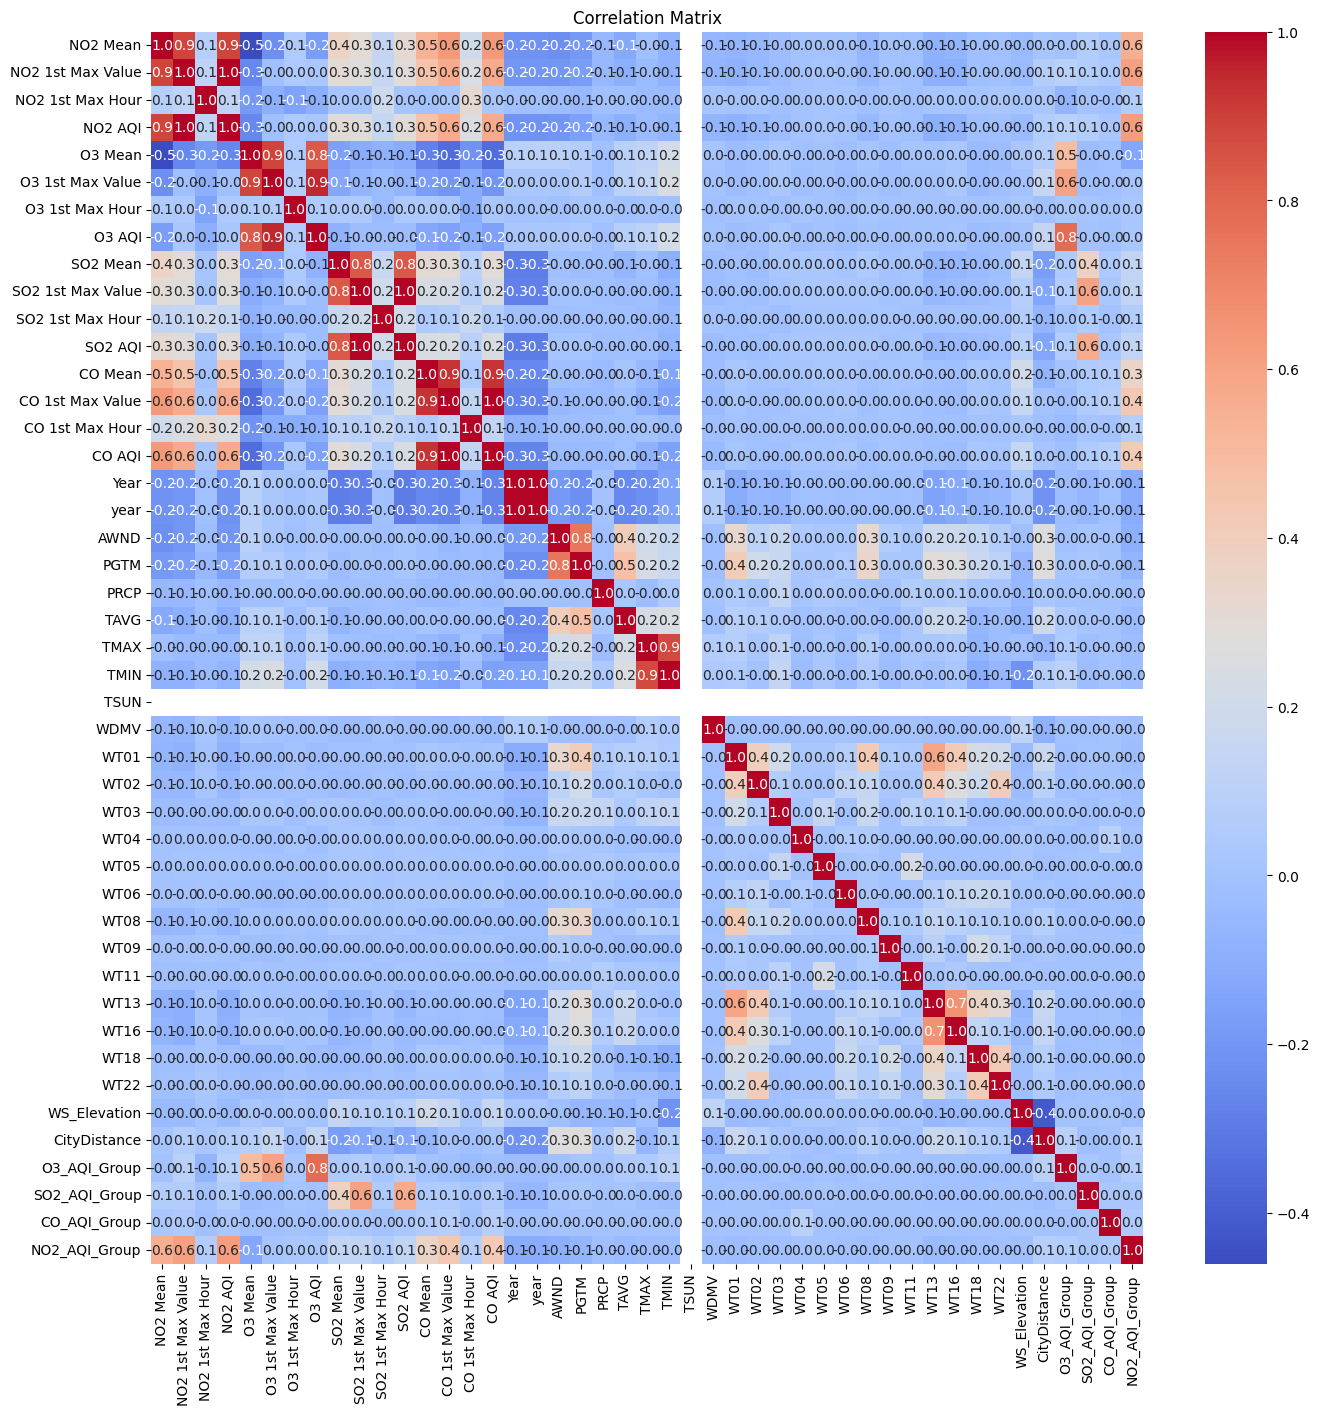

In [ ]:
# Create a visualisation of correlation matrix using seaborn heatmap with negatives being reds and positives being blues
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

plt.title('Correlation Matrix')
plt.show()


Transform Data to standardise data ranges and correct skewness

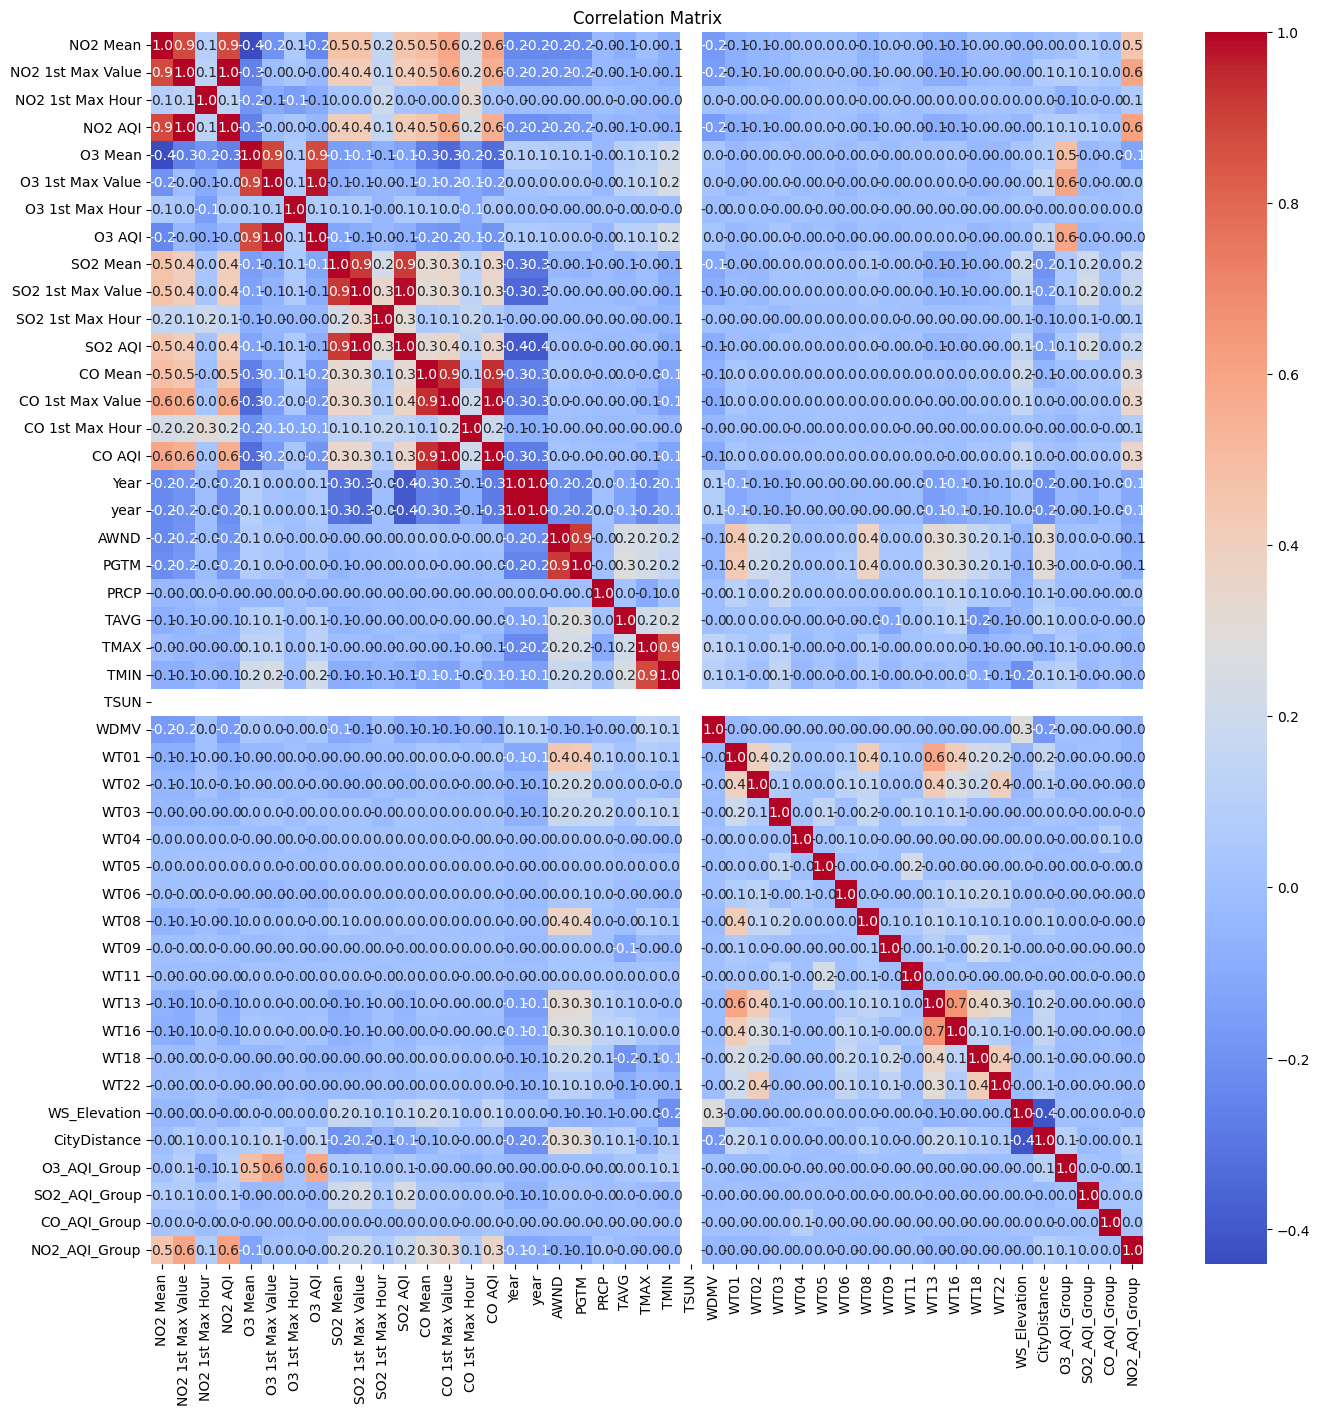

In [ ]:
# Use scikit learn to apply transformations to the data to standardise the data and correct skewness
# create a list of numeric columns
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
# drop WS_Latitude, WS_Longitude from numeric_columns
numeric_columns = numeric_columns.drop(['WS_Latitude', 'WS_Longitude'])

# create a list of columns with skewness greater than 1
skewness = merged_data[numeric_columns].skew()
skewness = skewness[skewness > 1]
skewness

# apply power transformer to columns with skewness greater than 1
power_transformer = PowerTransformer()
merged_data[skewness.index] = power_transformer.fit_transform(merged_data[skewness.index])

# apply standard scaler to all numeric columns
scaler = StandardScaler()
merged_data[numeric_columns] = scaler.fit_transform(merged_data[numeric_columns])

# perform correlation matrix again
correlation_matrix2 = merged_data[numeric_columns].corr()
correlation_matrix2 = correlation_matrix2.round(2)
correlation_matrix2

# Create a visualisation of correlation matrix using seaborn heatmap with negatives being reds and positives being blues
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix difference.

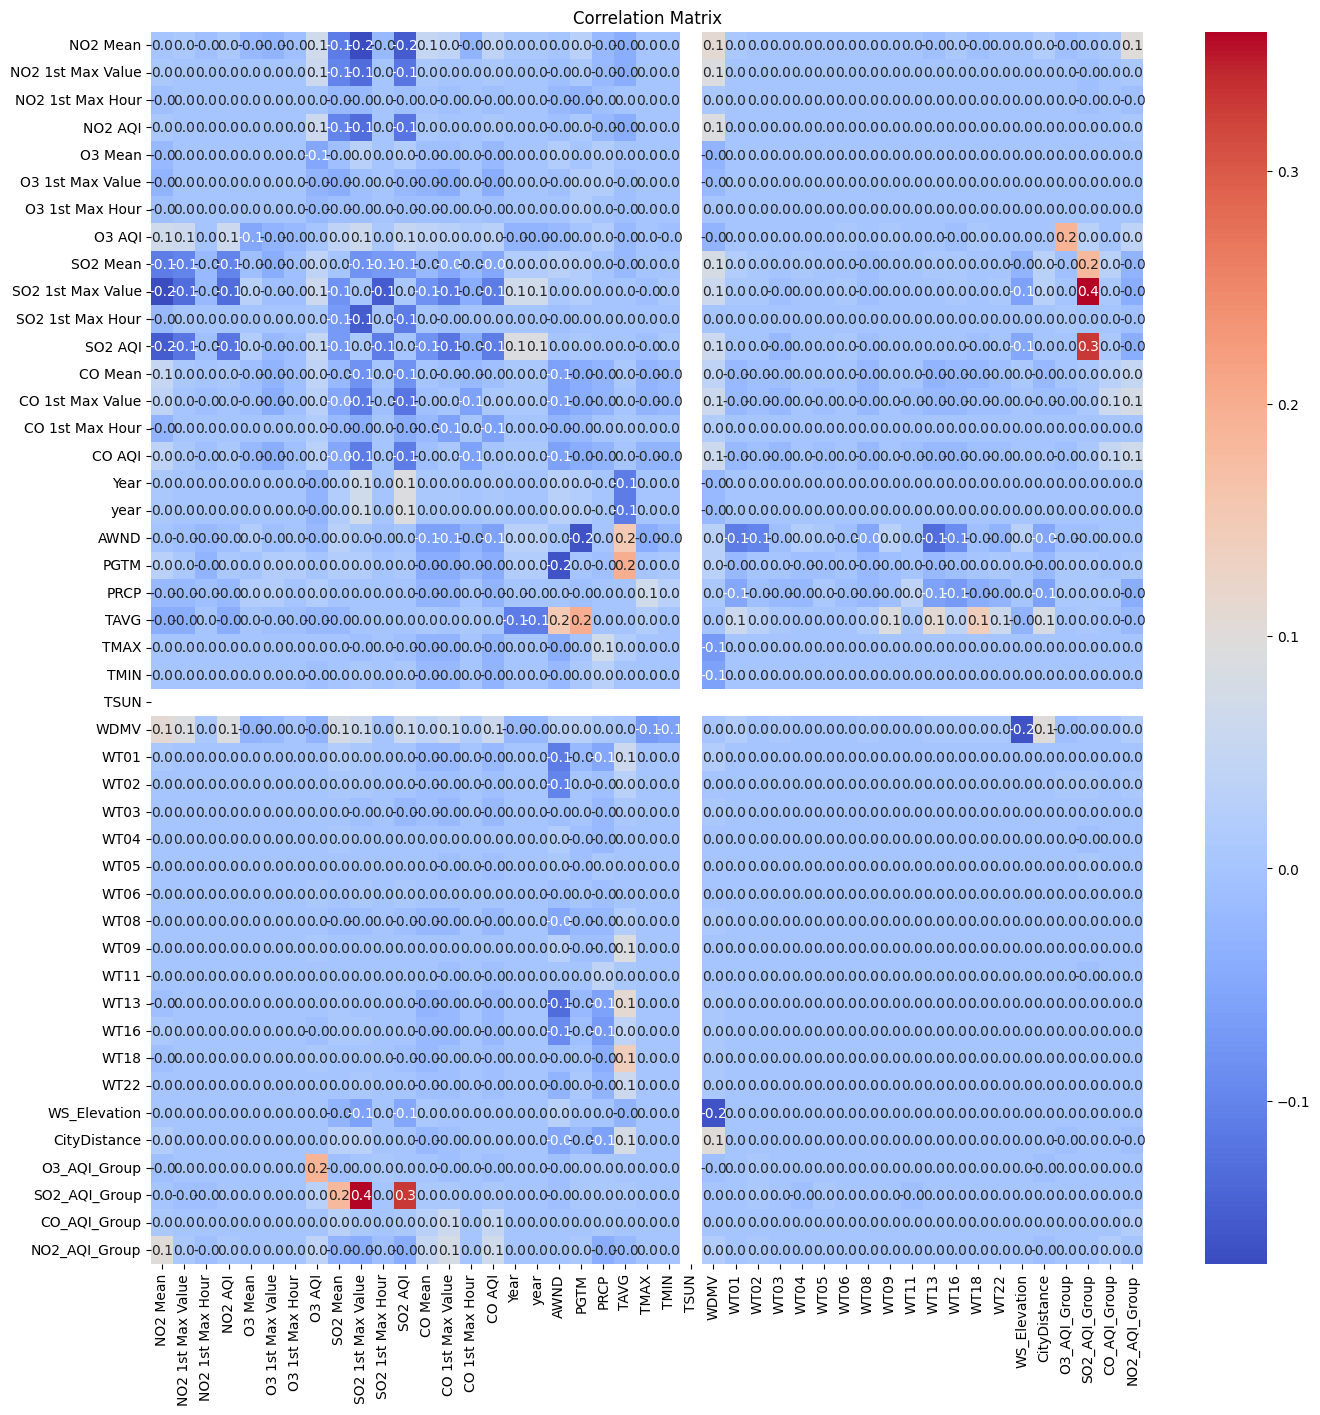

In [9]:
# minus correlation matrix from correlation matrix2
correlation_matrix_diff = correlation_matrix - correlation_matrix2
correlation_matrix_diff

# Create a visualisation of correlation matrix using seaborn heatmap with negatives being reds and positives being blues
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix_diff, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Matrix')
plt.show()
